# Вступ до машинного навчання

Джерела: \
https://github.com/amueller/introduction_to_ml_with_python

## Демостраційна частина

In [3]:
# перший виклик matplotlib займає певний час, це нормально
%matplotlib inline

### Essential Libraries and Tools

#### NumPy

In [4]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


#### SciPy

In [5]:
from scipy import sparse

# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("NumPy array:\n", eye)

NumPy array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [6]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n", sparse_matrix)


SciPy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [7]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n", eye_coo)

COO representation:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


#### matplotlib

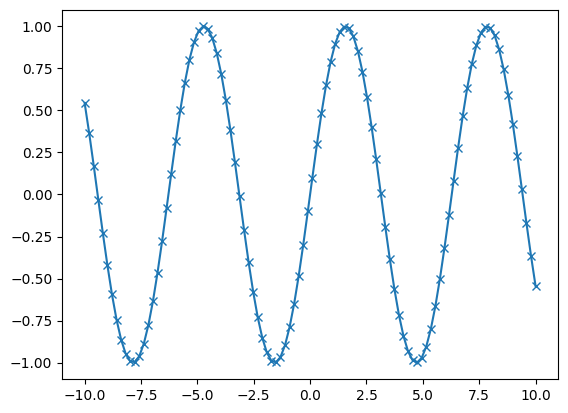

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# Create a second array using sine
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

#### pandas

In [9]:
import pandas as pd

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [10]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data_pandas, *['Age'], **{})
chart

In [11]:
# Select all rows that have an age column greater than 30
data_pandas[data_pandas['Age'] < 30]
data_pandas[data_pandas.Age > 30]

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [12]:
mask = data_pandas['Age'] < 30

In [13]:
data_pandas['Age'] < 30

0     True
1     True
2    False
3    False
Name: Age, dtype: bool

In [14]:
data_pandas[(data_pandas['Location'] == 'London') & (data_pandas['Name'] == 'Linda')]

,Name,Location,Age
3,Linda,London,33


In [15]:
data_pandas['Location'] = 4 * ['London']

In [16]:
data_pandas[(data_pandas['Location'] == 'London')]

,Name,Location,Age
0,John,London,24
1,Anna,London,13
2,Peter,London,53
3,Linda,London,33


In [17]:
data_pandas.iloc[::-1, :]

,Name,Location,Age
3,Linda,London,33
2,Peter,London,53
1,Anna,London,13
0,John,London,24


In [18]:
data_pandas.tail(2)

,Name,Location,Age
2,Peter,London,53
3,Linda,London,33


In [19]:
data_pandas.shape[0]

4

In [20]:
data_pandas['gender'] = ['F', 'M', 'F', 'M']

In [21]:
data_pandas

,Name,Location,Age,gender
0,John,London,24,F
1,Anna,London,13,M
2,Peter,London,53,F
3,Linda,London,33,M


In [22]:
type(data_pandas), type(data_pandas['gender'])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [23]:
data_pandas['gender'] = data_pandas['gender'].apply(lambda x: 1 if x == 'F' else 0)

In [24]:
data_pandas

,Name,Location,Age,gender
0,John,London,24,1
1,Anna,London,13,0
2,Peter,London,53,1
3,Linda,London,33,0


### Version check

In [25]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

Python version: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.23.5
SciPy version: 1.11.2
IPython version: 7.34.0
scikit-learn version: 1.2.2


### A First Application: Classifying Iris Species
#### Meet the Data

In [26]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [27]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [28]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [29]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [30]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [31]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [32]:
iris_dataset['data'].shape

(150, 4)

In [33]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [34]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [35]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [36]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [37]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Measuring Success: Training and Testing Data

In [38]:
df = pd.DataFrame(iris_dataset['data'])

In [39]:
df.columns = iris_dataset['feature_names']

In [40]:
df['target'] = iris_dataset['target']

In [41]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( # 80/20
    df.drop(['target'], axis=1), df['target'], test_size=0.2, random_state=42)

In [43]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (120, 4)
y_train shape: (120,)


In [44]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (30, 4)
y_test shape: (30,)


#### First Things First: Look at Your Data

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

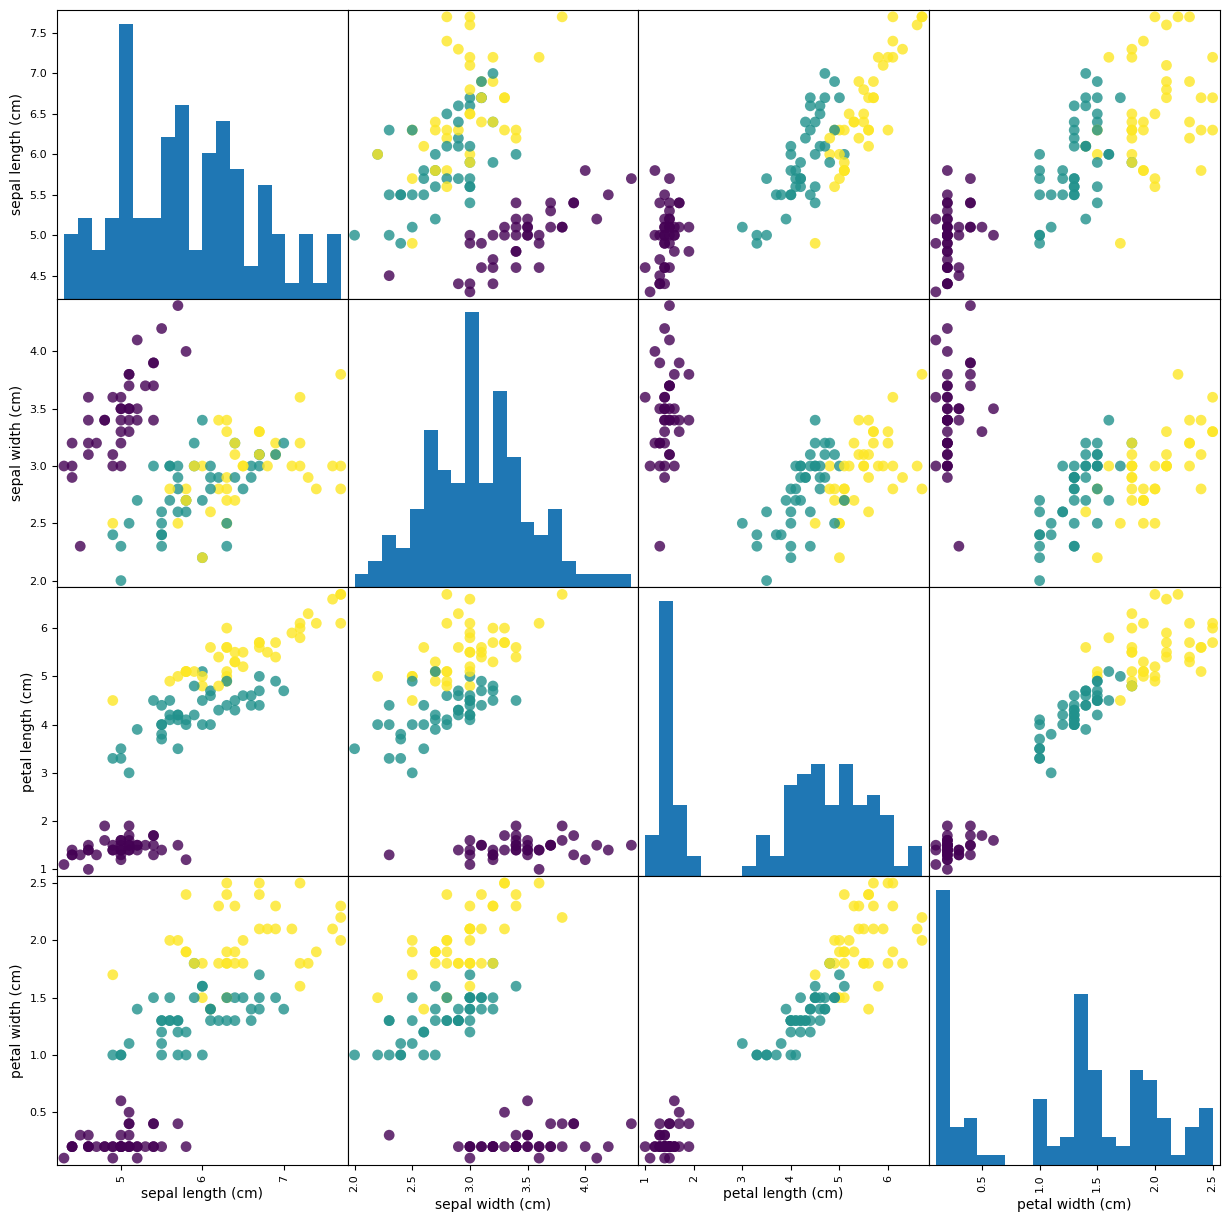

In [45]:
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(X_train, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)


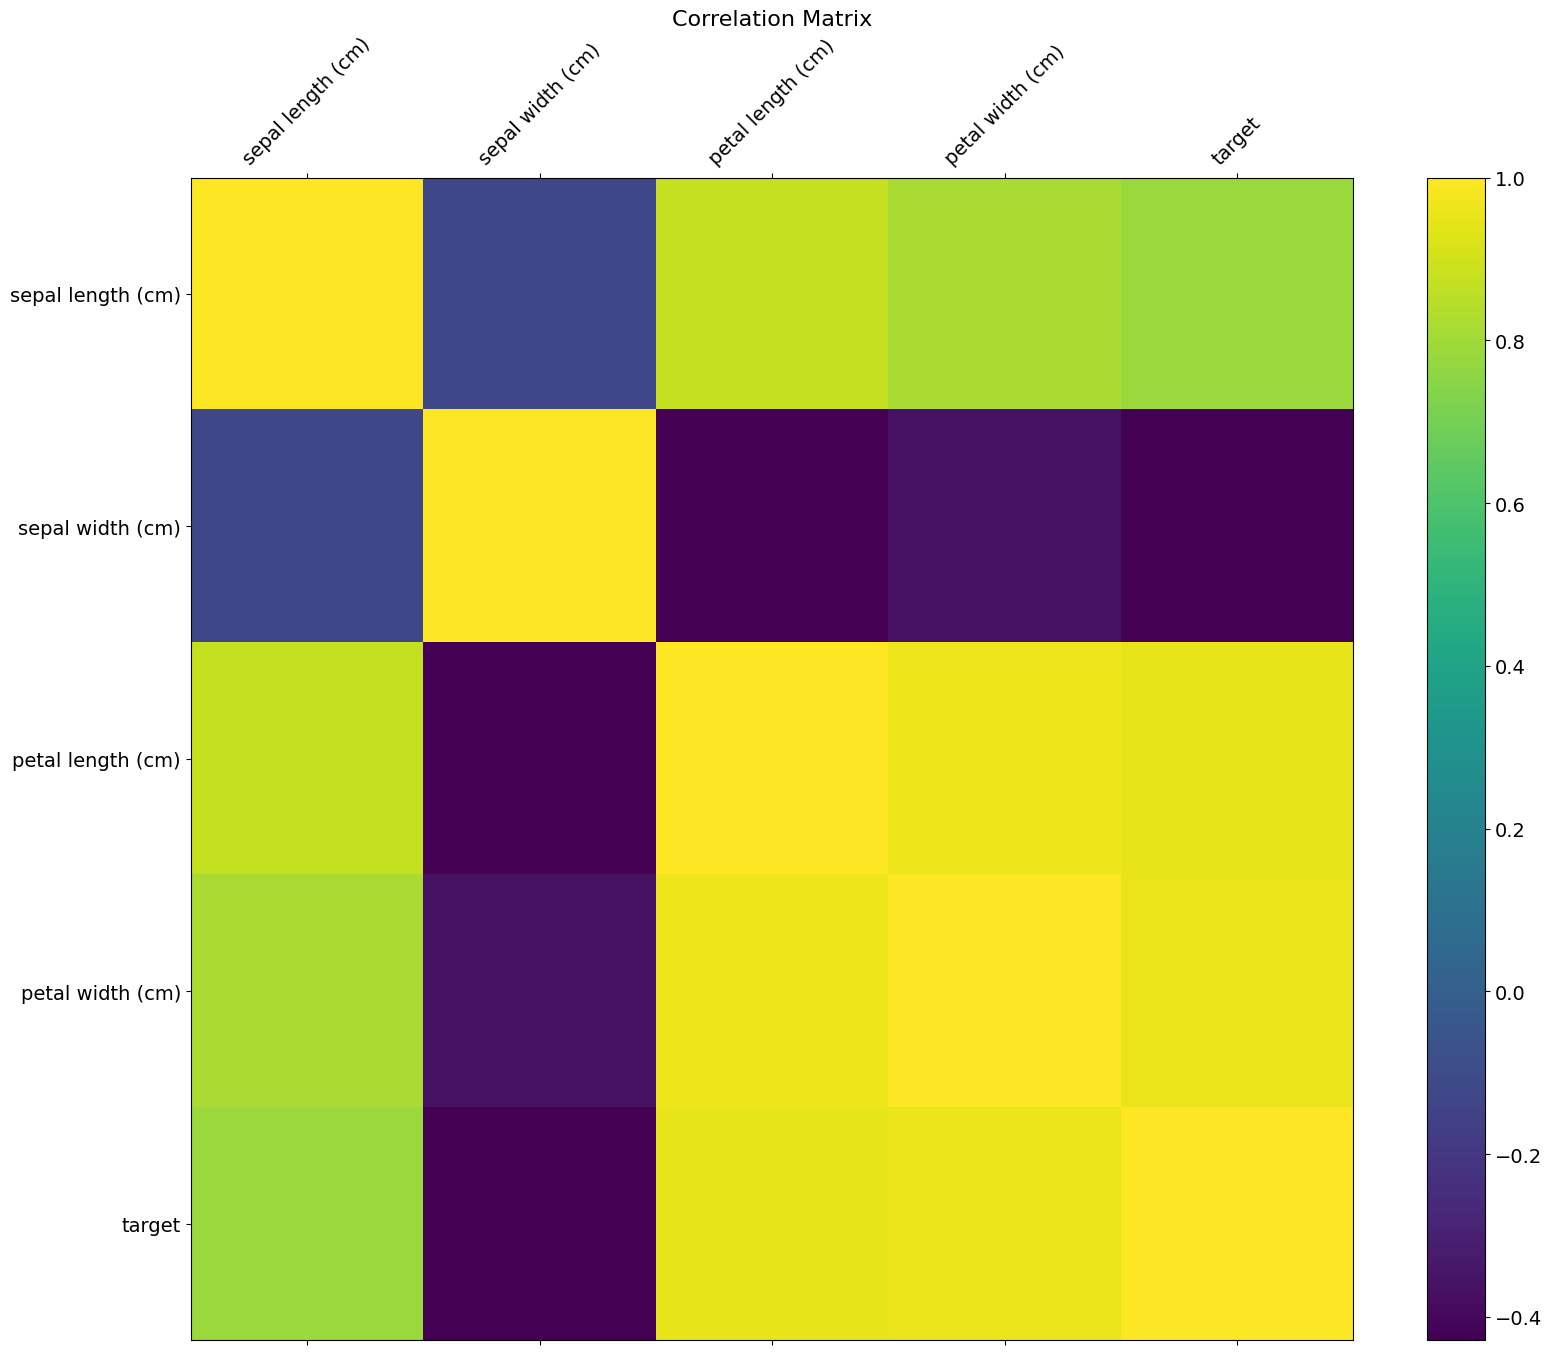

In [46]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns , fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#### Building Your First Model: k-Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Making Predictions

In [49]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [50]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### Evaluating the Model

In [51]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [52]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 1.00


In [53]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 1.00


### Summary and Outlook

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


## Home assignment

- This is the part I of H/A 1.
- Repeat the dataset preparation before training the model for the wine classification sample. Write your own brief description of the dataset (4-6 sentences).

* In this part, you are to perform an in-depth Exoloratory Data Analysis (EDA) only. You don't need to train and and evaluate a model - that will be part II.
- For EDA, do the following:
 - Investigate data types, number of features, target and its distribution
 - plot histograms
 - look for correlation of features (with target)
 - encode and/or normalize (scale) the features if necessary
 - look for anomalies: sample with > 3*sigma (std.) from the mean
 
Once you have finished the EDA and preprocessing, save the data frame with `df.to_csv('df_EDA.csv, index=False)` and proceed to the second notebook of the H/A 1 (02_linear_models) 

In [55]:
from sklearn.datasets import load_wine

In [56]:
wine_dataset = load_wine()